In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse

## 1 Подготовка данных

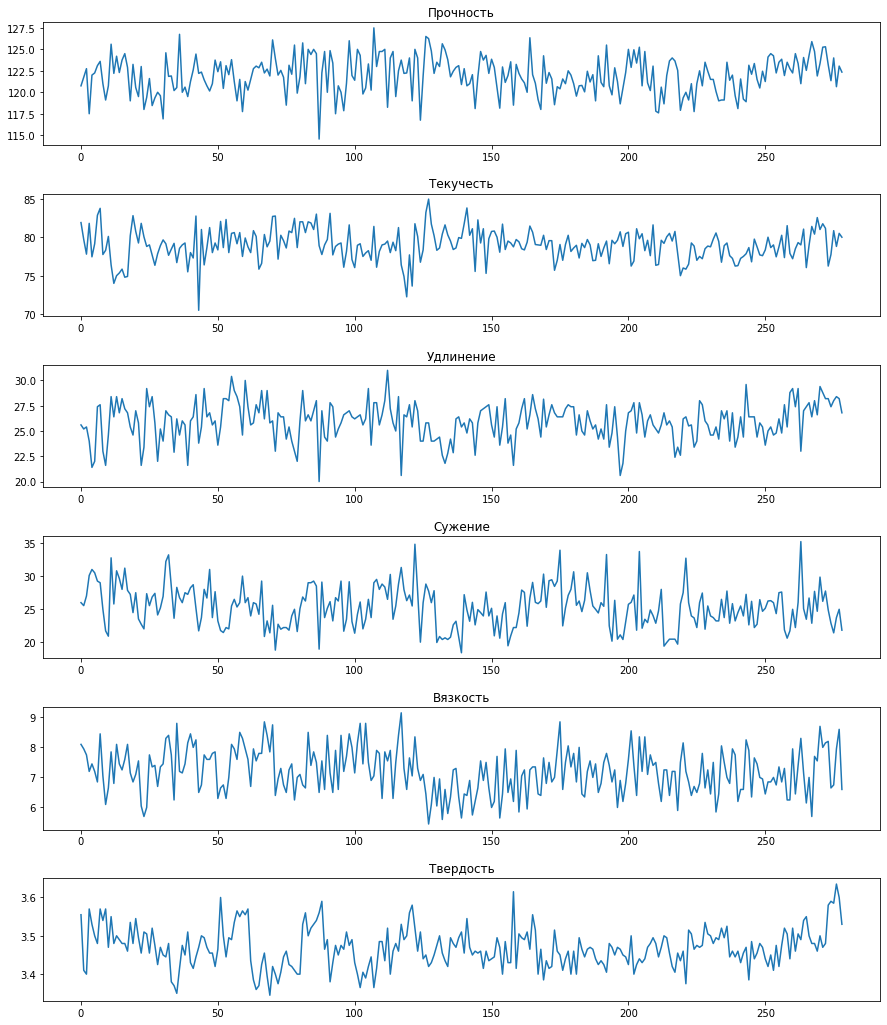

In [2]:
f = open("MEX71.TXT", 'r').read()
list = []

with open ("MEX71.TXT", 'r') as file:
    for i in file:
        row = []
        row.append((float(i[67:73])+float(i[93:98]))/2)
        row.append((float(i[73:77])+float(i[98:103]))/2)
        row.append((float(i[77:81])+float(i[103:107]))/2)
        row.append((float(i[81:84])+float(i[107:111]))/2)
        row.append((float(i[85:89])+float(i[111:115]))/2)
        row.append((float(i[89:93])+float(i[115:119]))/2)
        list.append(row)
df = pd.DataFrame(list)

m = []
for i in range(6):
    m.append(df.iloc[:,i].mean())
    
index = 0
I = {}
error = []
for i in range(df.size//6):
    if (abs(df.iloc[i][0]-m[0]) > 20):
        error.append(i)
    elif (abs(df.iloc[i][1]-m[1]) > 15):
        error.append(i)
    elif (abs(df.iloc[i][2]-m[2]) > 10):
        error.append(i)
    elif (abs(df.iloc[i][3]-m[3]) > 10):
        error.append(i)
    elif (abs(df.iloc[i][4]-m[4]) > 2):
        error.append(i)
    elif (abs(df.iloc[i][5]-m[5]) > 0.8):
        error.append(i)
    
    else:
        I[i] = index
        index +=1
for e in error[::-1]:
    df = df.drop(df.index[e])
df.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='columns', inplace = True)
df.rename(I, axis='index',  inplace = True)
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 18))
plt.subplots_adjust(hspace=0.4)
for i in range(6):
    ax[i].plot(df.iloc[:,i])
    ax[i].set_title(df.columns[i])

## 2 Основные числовые характеристики

In [3]:
#General
df.describe()

,Прочность,Текучесть,Удлинение,Сужение,Вязкость,Твердость
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,121.963799,78.979570,25.924014,25.370789,7.210932,3.469194
std,2.169540,2.035453,1.892235,3.173068,0.749314,0.051429
min,114.550000,70.500000,20.000000,18.450000,5.450000,3.345000
25%,120.625000,77.725000,24.600000,23.075000,6.650000,3.435000
50%,122.050000,79.000000,26.000000,25.500000,7.200000,3.465000
75%,123.500000,80.250000,27.200000,27.500000,7.750000,3.500000
max,127.500000,84.950000,31.000000,35.200000,9.150000,3.635000


In [4]:
Years = ["71", "72", "73", "74", "75", "76", "77", "78", "79", "80", "81", "82", "83", "84", "87", "88", "89", "90", "91", "92", "93"]
Year_data = []
for y in Years:
    File_name = "MEX"+y+".TXT"
    f = open(File_name, 'r').read()
    list = []

    flag = False
    for k in range(64, len(f)):
        if (f[k]=='1'):
            j=k
            break
    with open (File_name, 'r') as file:
        for i in file:
            row = []
            try:
                row.append((float(i[j:j+6])+float(i[j+26:j+31]))/2)
                row.append((float(i[j+6:j+10])+float(i[j+31:j+36]))/2)
                row.append((float(i[j+10:j+14])+float(i[j+36:j+40]))/2)
                row.append((float(i[j+14:j+17])+float(i[j+40:j+44]))/2)
                row.append((float(i[j+18:j+22])+float(i[j+44:j+48]))/2)
                row.append((float(i[j+22:j+26])+float(i[j+48:j+52]))/2)
                list.append(row)
            except ValueError: 
                continue
    buf_df = pd.DataFrame(list)

    m = []
    for i in range(6):
        m.append(buf_df.iloc[:,i].mean())

    index = 0
    I = {}
    error = []
    for i in range(buf_df.size//6):
        if (abs(buf_df.iloc[i][0]-m[0]) > 30):
            error.append(i)
        elif (abs(buf_df.iloc[i][1]-m[1]) > 25):
            error.append(i)
        elif (abs(buf_df.iloc[i][2]-m[2]) > 20):
            error.append(i)
        elif (abs(buf_df.iloc[i][3]-m[3]) > 20):
            error.append(i)
        elif (abs(buf_df.iloc[i][4]-m[4]) > 4):
            error.append(i)
        elif (abs(buf_df.iloc[i][5]-m[5]) > 1.5):
            error.append(i)

        else:
            I[index] = index
            index +=1
    for e in error[::-1]:
        buf_df = buf_df.drop(buf_df.index[e])
    Year_data.append([buf_df[0].mean(), buf_df[1].mean(), buf_df[2].mean(), buf_df[3].mean(), buf_df[4].mean(), buf_df[5].mean()])

dfYear = pd.DataFrame(Year_data)

In [5]:
dfYear.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='columns', inplace = True)
b = dict(enumerate(Years))
dfYear.rename(b, axis='index',  inplace = True)
dfYear


,Прочность,Текучесть,Удлинение,Сужение,Вязкость,Твердость
71,121.975536,78.988571,25.932857,25.406964,7.213571,3.468893
72,122.421620,78.788028,25.908920,26.627465,7.037089,3.456150
73,121.669789,79.516465,26.033082,26.895468,8.287160,3.469985
74,122.491404,80.877603,26.280751,29.610896,8.782203,3.457494
75,123.844000,81.985231,26.174923,28.882462,8.974231,3.448892
76,123.127099,82.480725,26.391508,29.158015,9.254294,3.450429
77,122.777086,81.320297,26.653395,29.505375,8.743918,3.451782
78,123.063377,80.976101,26.069739,29.152447,8.656281,3.454168
79,122.143579,77.626485,25.689005,29.744944,8.945506,3.491597
80,122.498170,79.712592,25.319766,30.337994,8.785944,3.480176


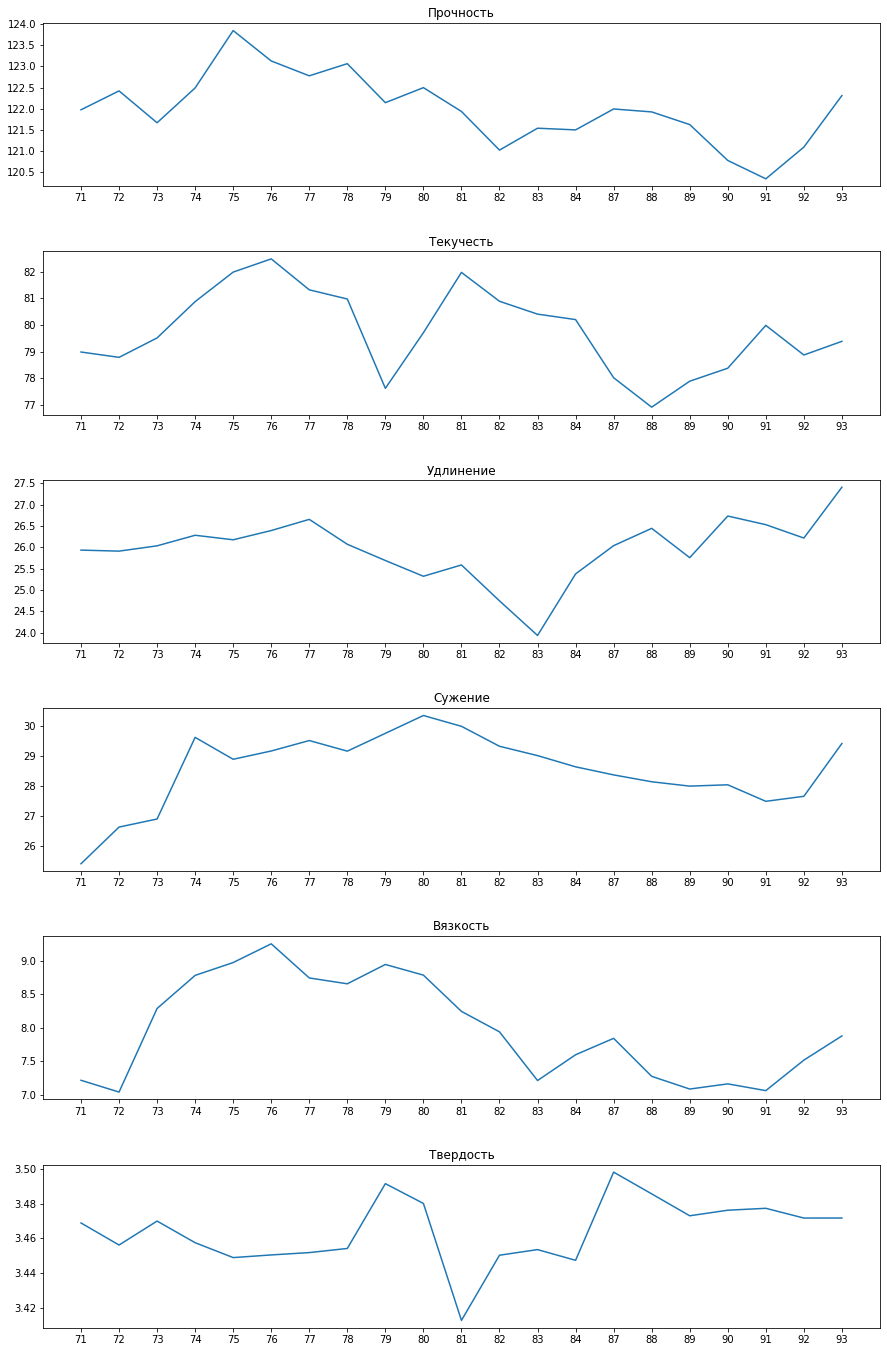

In [6]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 24))
plt.subplots_adjust(hspace=0.4)
for i in range(6):
    ax[i].plot(dfYear.iloc[:,i])
    ax[i].set_title(dfYear.columns[i])

In [7]:
#Covariation matrix
df.cov()

,Прочность,Текучесть,Удлинение,Сужение,Вязкость,Твердость
Прочность,4.706904,1.498628,1.173966,1.264955,0.143985,-0.023765
Текучесть,1.498628,4.143070,0.155951,-0.335941,-0.163373,-0.002021
Удлинение,1.173966,0.155951,3.580554,2.127673,0.534323,0.009616
Сужение,1.264955,-0.335941,2.127673,10.068361,1.179268,0.006210
Вязкость,0.143985,-0.163373,0.534323,1.179268,0.561472,-0.000129
Твердость,-0.023765,-0.002021,0.009616,0.006210,-0.000129,0.002645


In [8]:
#Вручную
Cov = []
for i in range(0, 6):
    row = []
    for j in range(0, i):
        row.append(Cov[j][i])
    for j in range(i, 6):
        row.append((df.iloc[:, j]*df.iloc[:, i]).mean() - df.iloc[:, i].mean()*df.iloc[:, j].mean()) #смещенная оценка
        
    Cov.append(row)

dfCov = pd.DataFrame(Cov)
dfCov.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='columns', inplace = True)
dfCov.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='rows', inplace = True)

dfCov

,Прочность,Текучесть,Удлинение,Сужение,Вязкость,Твердость
Прочность,4.690034,1.493257,1.169758,1.260421,0.143469,-0.023680
Текучесть,1.493257,4.128221,0.155392,-0.334737,-0.162787,-0.002014
Удлинение,1.169758,0.155392,3.567721,2.120047,0.532408,0.009581
Сужение,1.260421,-0.334737,2.120047,10.032274,1.175042,0.006188
Вязкость,0.143469,-0.162787,0.532408,1.175042,0.559459,-0.000128
Твердость,-0.023680,-0.002014,0.009581,0.006188,-0.000128,0.002635


In [9]:
#Correlation matrix
df.corr()

,Прочность,Текучесть,Удлинение,Сужение,Вязкость,Твердость
Прочность,1.000000,0.339363,0.285965,0.183750,0.088570,-0.212991
Текучесть,0.339363,1.000000,0.040490,-0.052014,-0.107116,-0.019307
Удлинение,0.285965,0.040490,1.000000,0.354365,0.376847,0.098809
Сужение,0.183750,-0.052014,0.354365,1.000000,0.495986,0.038055
Вязкость,0.088570,-0.107116,0.376847,0.495986,1.000000,-0.003341
Твердость,-0.212991,-0.019307,0.098809,0.038055,-0.003341,1.000000


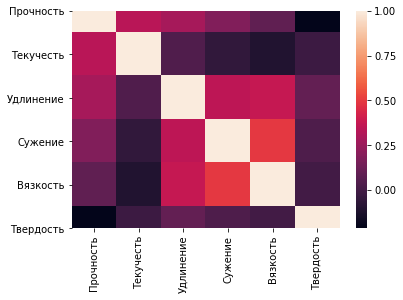

In [10]:
sns.heatmap(df.corr())

In [11]:
#Вручную
Corr = []
for i in range(0, 6):
    row = []
    for j in range(0, 6):
        row.append(Cov[i][j]/(Cov[i][i]*Cov[j][j])**(1/2))
    Corr.append(row)

dfCorr = pd.DataFrame(Corr)
dfCorr.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='columns', inplace = True)
dfCorr.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='rows', inplace = True)

dfCorr

,Прочность,Текучесть,Удлинение,Сужение,Вязкость,Твердость
Прочность,1.000000,0.339363,0.285965,0.183750,0.088570,-0.212991
Текучесть,0.339363,1.000000,0.040490,-0.052014,-0.107116,-0.019307
Удлинение,0.285965,0.040490,1.000000,0.354365,0.376847,0.098809
Сужение,0.183750,-0.052014,0.354365,1.000000,0.495986,0.038055
Вязкость,0.088570,-0.107116,0.376847,0.495986,1.000000,-0.003341
Твердость,-0.212991,-0.019307,0.098809,0.038055,-0.003341,1.000000


In [12]:
det = np.linalg.det(Cov)
InCov = []
for i in range (0, 6):
    row = []
    for j in range(0, 6):
        buf = []
        for k in range(0,6):
            if k==i:
                continue
            buf_row = Cov[k].copy()
            buf_row.pop(j)
            buf.append(buf_row)
        row.append(1/det*(-1)**(i+j)*np.linalg.det(buf))
    InCov.append(row)

dfInCov = pd.DataFrame(InCov)
dfInCov.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='columns', inplace = True)
dfInCov.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='rows', inplace = True)

dfInCov

,Прочность,Текучесть,Удлинение,Сужение,Вязкость,Твердость
Прочность,0.287570,-0.100041,-0.087154,-0.027291,0.038068,2.890162
Текучесть,-0.100041,0.282038,0.003343,0.012590,0.077931,-0.721281
Удлинение,-0.087154,0.003343,0.374351,-0.036767,-0.256179,-2.067623
Сужение,-0.027291,0.012590,-0.036767,0.140897,-0.250380,-0.444930
Вязкость,0.038068,0.077931,-0.256179,-0.250380,2.570491,2.045925
Твердость,2.890162,-0.721281,-2.067623,-0.444930,2.045925,413.518469


In [13]:
det = np.linalg.det(Corr)
InCorr = []
for i in range (0, 6):
    row = []
    for j in range(0, 6):
        buf = []
        for k in range(0,6):
            if k==i:
                continue
            buf_row = Corr[k].copy()
            buf_row.pop(j)
            buf.append(buf_row)
        row.append(1/det*(-1)**(i+j)*np.linalg.det(buf))
    InCorr.append(row)

dfInCorr = pd.DataFrame(InCorr)
dfInCorr.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='columns', inplace = True)
dfInCorr.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='rows', inplace = True)

dfInCorr

,Прочность,Текучесть,Удлинение,Сужение,Вязкость,Твердость
Прочность,1.348711,-0.440196,-0.356510,-0.187200,0.061665,0.321320
Текучесть,-0.440196,1.164315,0.012828,0.081023,0.118433,-0.075234
Удлинение,-0.356510,0.012828,1.335580,-0.219965,-0.361929,-0.200491
Сужение,-0.187200,0.081023,-0.219965,1.413520,-0.593175,-0.072347
Вязкость,0.061665,0.118433,-0.361929,-0.593175,1.438085,0.078560
Твердость,0.321320,-0.075234,-0.200491,-0.072347,0.078560,1.089812


## 3 Эллипс рассеяния

In [14]:
df1 = df.iloc[:,0:2].copy()
df1.cov()

m=[]
v=[]
s=[]
for i in range(6):
    m.append(df.iloc[:,i].mean())
    v.append(df.iloc[:,i].var(ddof = 0))
    s.append(df.iloc[:,i].std())

In [15]:
l = 0
Out = []
In = []
Check = 4*(1-Corr[0][1]**2)
for i, r in df.iterrows():
    if (((r[0]-m[0])**2/v[0]-2*Corr[0][1]*(r[0]-m[0])/s[0]*(r[1]-m[1])/s[1]+(r[1]-m[1])**2/v[1])<=Check):
        l +=1
        In.append([r[0],r[1]])
    else:
        Out.append([r[0],r[1]])
print("Percent of data, inside scatter ellipse:", l/2.79, "%")
dfIn = pd.DataFrame(In)
dfOut = pd.DataFrame(Out)

Percent of data, inside scatter ellipse: 87.09677419354838 %


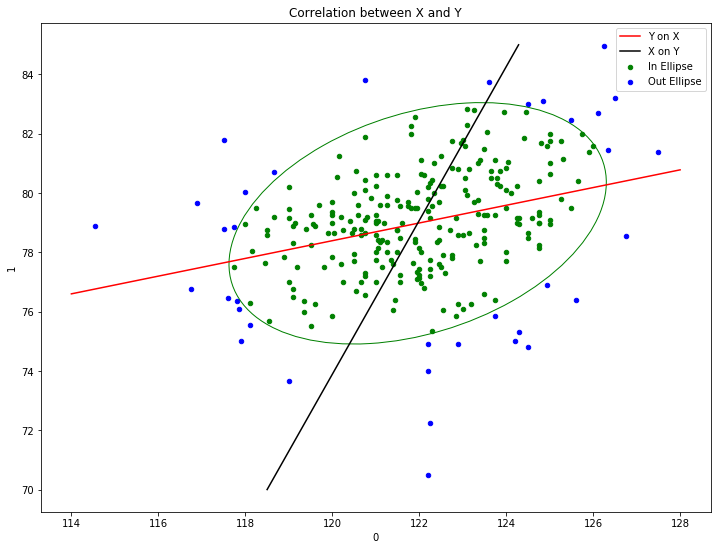

In [16]:
from scipy.stats.stats import pearsonr

df1 = df.iloc[:,0:2].copy()

ux, uy = m[0], m[1]
sx, sy = v[0], v[1]

r, p = pearsonr(df1.iloc[:,0], df1.iloc[:,1])
bx = r*sy/sx
ax = uy - ux*r*sy/sx
by = r*sx/sy
ay = ux - uy*r*sx/sy

def f1x(y):
    return ay + by * y

def f1y(x):
    return ax + bx * x

x = np.linspace(114, 128)
y = np.linspace(70, 85)
plt.rcParams["figure.figsize"] = (12, 9)

Ax = dfIn.plot(x=0, y=1, kind='scatter', title='Correlation between X and Y', color='green')
dfOut.plot(ax=Ax,x=0, y=1, kind='scatter', color='blue')

Ax = plt.gca() 
plt.plot(x, f1y(x),color='red')
plt.plot(f1x(y), y,color='black')

eigvals, eigvecs = np.linalg.eigh(np.cov(df1.iloc[:,0], df1.iloc[:,1]))
order = eigvals.argsort()[::-1]
eigvals, eigvecs = eigvals[order], eigvecs[:, order]
vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
theta = np.arctan2(vy, vx)

width, height = 2 * 2 * np.sqrt(eigvals)
ell = Ellipse(xy=(m[0], m[1]), width=width, height=height, angle=np.degrees(theta)) 
ell.set_facecolor('none')
ell.set_edgecolor('green')

Ax = plt.gca() 
Ax.add_artist(ell)

plt.legend(('Y on X', 'X on Y','In Ellipse', 'Out Ellipse'));
plt.show()

## 4 Нелинейная регрессия

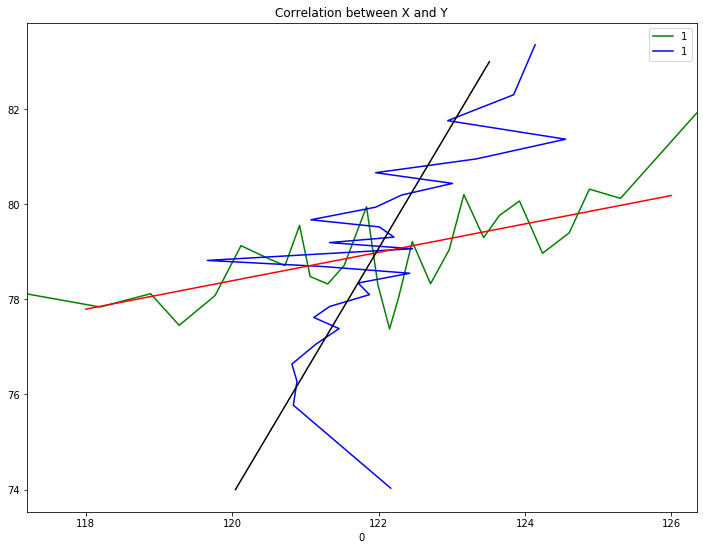

In [17]:
MCR_XY = []
MCR_YX = []
n = 28 
df1.sort_values(by=['Прочность'],inplace = True)
for i in range(n-1):
    MCR_XY.append([df1.iloc[i*(280//n):(i+1)*(280//n), 0].mean(), df1.iloc[i*(280//n):(i+1)*(280//n), 1].mean()])
MCR_XY.append([df1.iloc[(i+1)*(280//n):280, 0].mean(), df1.iloc[(i+1)*(280//n):280, 1].mean()])
dfMCR1 = pd.DataFrame(MCR_XY)

df1.sort_values(by=['Текучесть'],inplace = True)
for i in range(n-1):
    MCR_YX.append([df1.iloc[i*(280//n):(i+1)*(280//n), 0].mean(), df1.iloc[i*(280//n):(i+1)*(280//n), 1].mean()])
MCR_YX.append([df1.iloc[(i+1)*(280//n):280, 0].mean(), df1.iloc[(i+1)*(280//n):280, 1].mean()])

dfMCR2 = pd.DataFrame(MCR_YX)

plt.rcParams["figure.figsize"] = (12, 9)

Ax = dfMCR1.plot(x=0, y=1, kind='line', title='Correlation between X and Y', color='green')
dfMCR2.plot(ax=Ax,x=0, y=1, kind='line', color='blue')

r, p = pearsonr(df1.iloc[:,0], df1.iloc[:,1])
bx = r*sy/sx
ax = uy - ux*r*sy/sx
by = r*sx/sy
ay = ux - uy*r*sx/sy

def f1x(y):
    return ay + by * y

def f1y(x):
    return ax + bx * x

x = np.linspace(118, 126)
y = np.linspace(74, 83)

Ax = plt.gca() 
plt.plot(x, f1y(x),color='red')
plt.plot(f1x(y), y,color='black')
plt.show()

## 5 Линейная регрессия

In [18]:
b1i = []
buf = []
for k in range(1,6):
    buf_row = Cov[k].copy()
    buf_row.pop(0)
    buf.append(buf_row)
den = np.linalg.det(buf)

for i in range(1,6):
    buf = []
    for k in range(1,6):
        buf_row = Cov[k].copy()
        buf_row.pop(i)
        buf.append(buf_row)
    b1i.append((-1)**(i+1)*np.linalg.det(buf)/den)
print('X1* =', m[0], '+', b1i[0], '(X1 -', m[1],') +', b1i[1], '(X2 -', m[2],') +',b1i[2], '(X3 -', m[3],') +', b1i[3], '(X4 -', m[4],') +', b1i[4], '(X5 -', m[5],')')

def linRegX1(Prd): #Prd - list of predictor variable
    return m[0] + b1i[0]*(Prd[0]-m[1])+ b1i[1]*(Prd[1]-m[2])+ b1i[2]*(Prd[2]-m[3])+ b1i[3]*(Prd[3]-m[4])+ b1i[4]*(Prd[4]-m[5])

X1* = 121.96379928315407 + 0.3478835874847639 (X1 - 78.97956989247311 ) + 0.30307205424360856 (X2 - 25.924014336917555 ) + 0.09490221798255756 (X3 - 25.370788530465937 ) + -0.1323794602461477 (X4 - 7.210931899641579 ) + -10.050306629811866 (X5 - 3.4691935483870995 )


In [19]:
err = []
for i, r in df.iterrows():
    err.append(r[0]-linRegX1(r[1:6].values.tolist()))
dfErr = pd.DataFrame(err)
dfErr.rename({0: 'Ошибка прогноза'}, axis='columns', inplace = True)
dfErr.rename(I, axis='index',  inplace = True)

dfErr = pd.concat([dfErr, df.iloc[:, 1:6]], axis=1)
dfErr.corr()

,Ошибка прогноза,Текучесть,Удлинение,Сужение,Вязкость,Твердость
Ошибка прогноза,1.000000e+00,-1.861162e-12,-2.303599e-13,-4.692528e-13,-1.312612e-13,9.199970e-13
Текучесть,-1.861162e-12,1.000000e+00,4.049039e-02,-5.201421e-02,-1.071162e-01,-1.930652e-02
Удлинение,-2.303599e-13,4.049039e-02,1.000000e+00,3.543647e-01,3.768466e-01,9.880887e-02
Сужение,-4.692528e-13,-5.201421e-02,3.543647e-01,1.000000e+00,4.959858e-01,3.805539e-02
Вязкость,-1.312612e-13,-1.071162e-01,3.768466e-01,4.959858e-01,1.000000e+00,-3.340788e-03
Твердость,9.199970e-13,-1.930652e-02,9.880887e-02,3.805539e-02,-3.340788e-03,1.000000e+00


In [20]:
RemainVar = 1/InCov[0][0]
print(RemainVar)

3.477420084850378


## 6 Частные коэффициенты корреляции

In [21]:
#Вручную
IndivCorr = []
for i in range(0, 6):
    row = []
    for j in range(0, i):
        row.append(IndivCorr[j][i])
    for j in range(i, 6):
        row.append((-1)*InCov[i][j]/((InCov[i][i]*InCov[j][j])**(1/2))) #смещенная оценка
        
    IndivCorr.append(row)

dfIC = pd.DataFrame(IndivCorr)
dfIC.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='columns', inplace = True)
dfIC.rename({0: 'Прочность', 1: 'Текучесть', 2: 'Удлинение', 3: 'Сужение', 4: 'Вязкость', 5: 'Твердость'}, axis='rows', inplace = True)

dfIC


,Прочность,Текучесть,Удлинение,Сужение,Вязкость,Твердость
Прочность,-1.000000,0.351278,0.265630,0.135580,-0.044278,-0.265035
Текучесть,0.351278,-1.000000,-0.010287,-0.063157,-0.091526,0.066789
Удлинение,0.265630,-0.010287,-1.000000,0.160091,0.261154,0.166182
Сужение,0.135580,-0.063157,0.160091,-1.000000,0.416045,0.058290
Вязкость,-0.044278,-0.091526,0.261154,0.416045,-1.000000,-0.062753
Твердость,-0.265035,0.066789,0.166182,0.058290,-0.062753,-1.000000


In [22]:
dfCorr

,Прочность,Текучесть,Удлинение,Сужение,Вязкость,Твердость
Прочность,1.000000,0.339363,0.285965,0.183750,0.088570,-0.212991
Текучесть,0.339363,1.000000,0.040490,-0.052014,-0.107116,-0.019307
Удлинение,0.285965,0.040490,1.000000,0.354365,0.376847,0.098809
Сужение,0.183750,-0.052014,0.354365,1.000000,0.495986,0.038055
Вязкость,0.088570,-0.107116,0.376847,0.495986,1.000000,-0.003341
Твердость,-0.212991,-0.019307,0.098809,0.038055,-0.003341,1.000000


In [23]:
print('Выявлена ложная регрессия сужения на удлинение, больше ничего корреляционный анализ не выявил')

Выявлена ложная регрессия сужения на удлинение, больше ничего корреляционный анализ не выявил


## 7 Каноническая корреляция

In [24]:
bufMtrx1 = np.linalg.inv([row[0:3] for row in Cov[0:3]])
bufMtrx2 = [row[3:6] for row in Cov[0:3]]
bufMtrx3 = np.linalg.inv([row[3:6] for row in Cov[3:6]])
bufMtrx4 = [row[0:3] for row in Cov[3:6]]
bufMtrx = np.matmul(np.matmul(np.matmul(bufMtrx1, bufMtrx2), bufMtrx3),bufMtrx4)
Eigen = np.linalg.eig(bufMtrx)
r1 = Eigen[0][0]**(1/2)
r2 = Eigen[0][1]**(1/2)
r3 = Eigen[0][2]**(1/2)
print("r1 =", r1, "\nr2 =", r2,"\nr3 =", r3)


r1 = 0.44855578673622015 
r2 = 0.29169067055502984 
r3 = 0.04572595649359226


In [25]:
df.cov()

,Прочность,Текучесть,Удлинение,Сужение,Вязкость,Твердость
Прочность,4.706904,1.498628,1.173966,1.264955,0.143985,-0.023765
Текучесть,1.498628,4.143070,0.155951,-0.335941,-0.163373,-0.002021
Удлинение,1.173966,0.155951,3.580554,2.127673,0.534323,0.009616
Сужение,1.264955,-0.335941,2.127673,10.068361,1.179268,0.006210
Вязкость,0.143985,-0.163373,0.534323,1.179268,0.561472,-0.000129
Твердость,-0.023765,-0.002021,0.009616,0.006210,-0.000129,0.002645


In [26]:
print(Eigen[1][0]/1.6369)
print(np.matmul(np.matmul(bufMtrx3, bufMtrx4),Eigen[1][0]/1.6369)/r1)

[-0.03475749  0.55527512 -0.0337555 ]
[-0.01819086 -0.41359461 -0.50068381]


In [27]:
print(np.matmul(np.matmul(Eigen[1][0], [row[0:3] for row in Cov[0:3]]), [[Eigen[1][0][0]],[Eigen[1][0][1]],[Eigen[1][0][2]]]))

[3.27392211]


$$U_1 = -0.03475749*Прочность + 0.55527512 * Текучесть -0.0337555*Удлинение $$
$$V_1 = -0.01819086*Сужение - 0.41359461 * Вязкость -0.50068381*Твердость $$

In [28]:
from sklearn.cross_decomposition import CCA
n_components = 3
cca = CCA(n_components)
cca.fit(df.iloc[:, 0:3] ,df.iloc[:, 3:6] )
U, V = cca.transform(df.iloc[:, 0:3], df.iloc[:, 3:6])
for i in range(n_components):
    print(np.corrcoef(U[:,i], V[:,i])[0,1])

0.4485557774295076
0.29169067660517906
0.04572595649407241


## 8 Метод главных компонент

In [29]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df.values
# Standardizing the features
St_x = StandardScaler().fit_transform(x)

In [30]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
principalComponents = pca1.fit_transform(St_x)
principalStDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalStDf.head()

,principal component 1,principal component 2
0,-0.538505,-0.400332
1,-0.345013,0.325664
2,-0.618279,0.073268
3,0.364356,-1.348557
4,0.165965,-1.293786


In [31]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,0.329156,0.805414
1,-0.007460,0.125622
2,1.574315,-0.710215
3,2.731863,-2.755452
4,3.826559,-3.082461


In [32]:
pca1.explained_variance_ratio_

array([0.32212935, 0.23216647])

In [33]:
pca2.explained_variance_ratio_

array([0.48732122, 0.25743837])